In [ ]:
#imported necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [ ]:
#loading csv file
data = pd.read_csv('/content/employees.csv')

In [ ]:
data.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
0,198,Donald,OConnell,DOCONNEL,650.507.9833,21-JUN-07,SH_CLERK,2600,-,124,50
1,199,Douglas,Grant,DGRANT,650.507.9844,13-JAN-08,SH_CLERK,2600,-,124,50
2,200,Jennifer,Whalen,JWHALEN,515.123.4444,17-SEP-03,AD_ASST,4400,-,101,10
3,201,Michael,Hartstein,MHARTSTE,515.123.5555,17-FEB-04,MK_MAN,13000,-,100,20
4,202,Pat,Fay,PFAY,603.123.6666,17-AUG-05,MK_REP,6000,-,201,20


In [ ]:
# Calculate mean, median, and mode for income/salary
mean_salary = data['SALARY'].mean()
median_salary = data['SALARY'].median()
mode_salary = data['SALARY'].mode()

print("\nMean Income/Salary:", mean_salary)
print("Median Income/Salary:", median_salary)
print("Mode Income/Salary:", mode_salary[0])



Mean Income/Salary: 6182.32
Median Income/Salary: 4600.0
Mode Income/Salary: 2500


In [ ]:
# Calculate skewness for salary and date columns
salary_skewness = data['SALARY'].skew()

print("Skewness of Income/Salary:", salary_skewness)



Skewness of Income/Salary: 1.80030904692645



Salary Summary Statistics:
 count       50.000000
mean      6182.320000
std       4586.181772
min       2100.000000
25%       2725.000000
50%       4600.000000
75%       8150.000000
max      24000.000000
Name: SALARY, dtype: float64


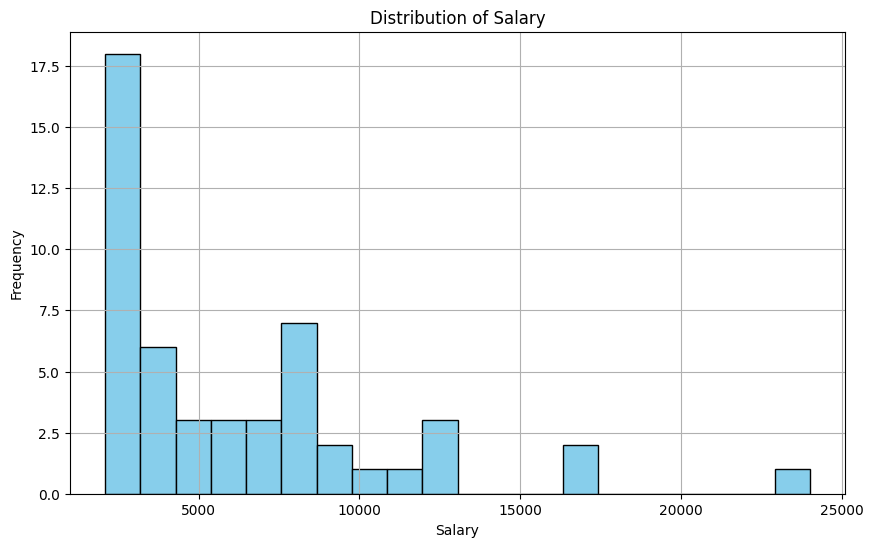

In [ ]:
# Summary statistics for salary
salary_summary = data['SALARY'].describe()
print("\nSalary Summary Statistics:\n", salary_summary)

# Visualize the distribution of salary using a histogram
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data['SALARY'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Fail to reject the null hypothesis. There is no significant difference in income/salary between January and February.


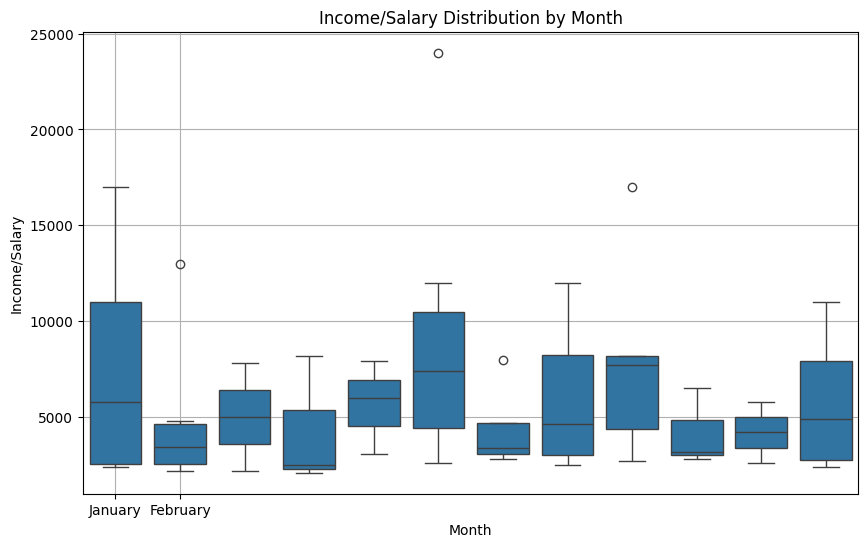

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway


# Convert date column to datetime format
data['HIRE_DATE'] = pd.to_datetime(data['HIRE_DATE'])

# Hypothesis: There is a significant difference in income/salary between different months of the year
# Selecting January and February as examples
january_income = data[data['HIRE_DATE'].dt.month == 1]['SALARY']
february_income = data[data['HIRE_DATE'].dt.month == 2]['SALARY']

# Perform one-way ANOVA test
f_statistic, p_value = f_oneway(january_income, february_income)

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in income/salary between January and February.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in income/salary between January and February.")

# Visualize the distribution of income/salary for January and February
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['HIRE_DATE'].dt.month, y=data['SALARY'])
plt.title('Income/Salary Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Income/Salary')
plt.xticks(ticks=[0, 1], labels=['January', 'February'])
plt.grid(True)
plt.show()


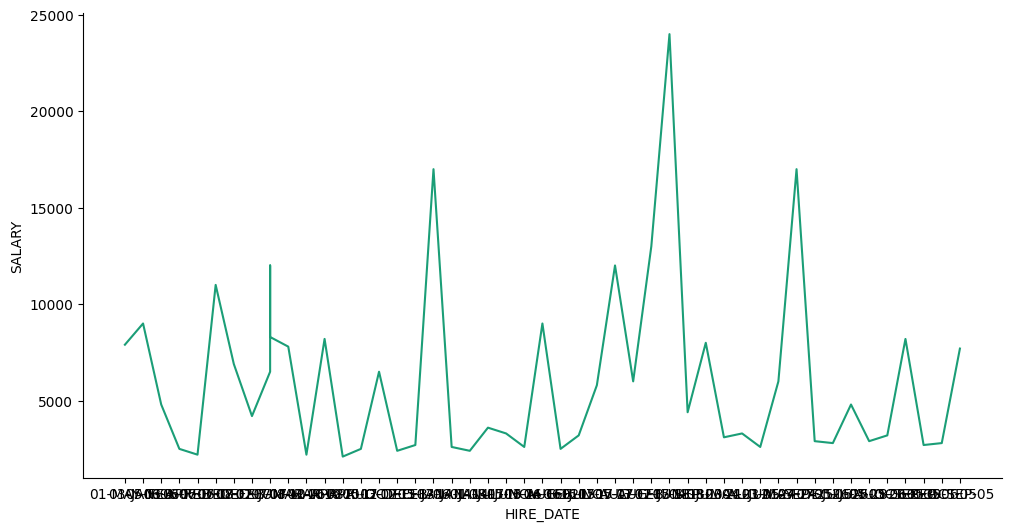

In [ ]:
# @title HIRE_DATE vs SALARY

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['HIRE_DATE']
  ys = series['SALARY']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('HIRE_DATE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('HIRE_DATE')
_ = plt.ylabel('SALARY')